In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#membaca data csv
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#cek jumlah baris dalam kolom
iris.shape

(150, 6)

In [4]:
#value apa saja yang ada pada atribut species
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
#memeriksa apakah dataset terdapat nilai null
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#menghapus atribut atau coulum id
iris.drop(columns="Id", inplace=True)
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

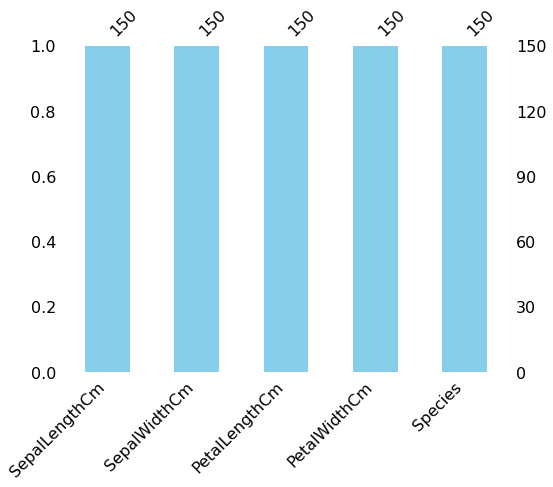

In [7]:
#cek data yang kosong menggunakan grafik
import missingno as msno
msno.bar(iris, figsize=(8,6), color='skyblue')
plt.show()

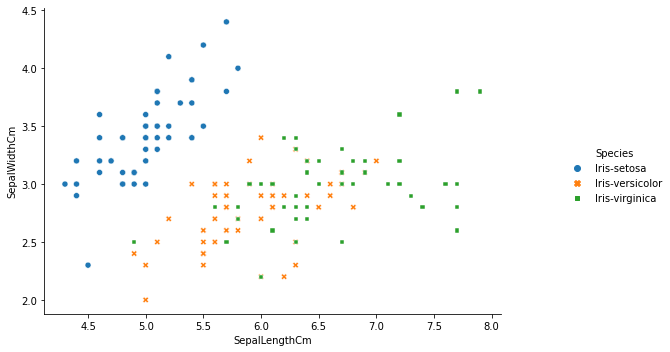

In [8]:
#melakukan visualisasi data
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

In [9]:
#mencari korelasi antar fitur
iris.corr()

C:\Users\satri\AppData\Local\Temp\ipykernel_7728\892957787.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\satri\AppData\Local\Temp\ipykernel_7728\919836623.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='Greens')


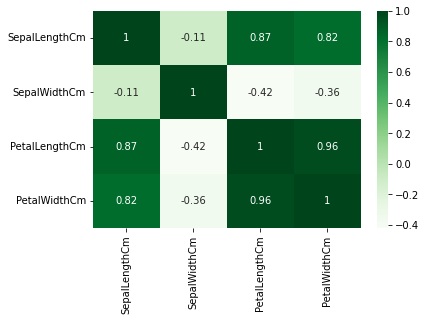

In [10]:
#draw heatmap
sns.heatmap(iris.corr(),annot=True,cmap='Greens')
plt.show()

In [11]:
#memisahkan antara fitur dan label
#x sebagai fitur dan y sebagai label
x = iris.drop('Species', axis=1)
y = iris['Species']

In [12]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
#mengubah data menjadi angka (label encoding)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
#membagi data menjadi dua bagian yaitu data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))



The shape of x_train is: (120, 4)
The shape of x_test is: (30, 4)
The shape of y_train is: (120,)
The shape of y_test is: (30,)


In [16]:
#membuat model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [17]:
#prediksi menggunakan data training
pred_train = model.predict(x_train)

cm = confusion_matrix(y_train, pred_train)

print('Confusion matrix Naive Bayes\n', cm)
print('')

print('Akurasi pada saat training: {}' .format(accuracy_score(y_train,pred_train)))

Confusion matrix Naive Bayes
 [[39  0  0]
 [ 0 34  3]
 [ 0  3 41]]

Akurasi pada saat training: 0.95


In [18]:
#prediksi pada data testing
pred_test = model.predict(x_test)

In [19]:
#performa yang dihasilkan
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')
print('Confusin matrix for DecisionTree\n', cm)
print('')
print('Akurasi pada data test: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('f1-score: %.3f' %f1)

Confusin matrix for DecisionTree
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Akurasi pada data test: 0.967
Precision: 0.967
Recall: 0.967
f1-score: 0.967
